# EDA
Perform time series Exploratory Data Analysis (EDA) 
Data: pred_maint_timeseries_with_failures.csv


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import numpy as np
from scipy.stats import shapiro, normaltest, probplot

from statsmodels.tsa.seasonal import seasonal_decompose

Defaulting to user installation because normal site-packages is not writeable


In [7]:
%run "/home/rlz-98/Documents/GitHub/Data-Science-Portfolio/Predictive Maintenance/pred_maint_failures/notebooks/variables.py"

In [9]:
%run "/home/rlz-98/Documents/GitHub/Data-Science-Portfolio/Predictive Maintenance/pred_maint_failures/notebooks/functions.ipynb" 

# Data loading

Load the two CSV files, pred_maint_timeseries_with_failures.csv into pandas DataFrame.


In [64]:
# df = pd.read_csv(f'{DATA_DIR}/pred_maint_timeseries_with_failures.csv')
df = pd.read_csv(f'{DATA_DIR}/pred_maint_year_outliers_nulls.csv')
display(df.head())

,machineid,datetimestamp,enginegastemperature1,enginegastemperature2,enginegastemperature3,enginegastemperature4,enginegastemperature5,enginegastemperature6,pressure
0,1,2025-01-01 00:00:00,302.483571,385.408617,303.238443,307.615149,298.829233,298.829315,103.158426
1,1,2025-01-01 00:10:00,303.837174,300.111109,297.861035,297.340913,299.412622,301.110395,98.464047
2,1,2025-01-01 00:20:00,299.877724,301.777757,302.085056,304.162309,298.533004,299.850807,100.190252
3,1,2025-01-01 00:30:00,303.323272,303.895963,294.494511,305.651141,301.865595,298.067635,97.682460
4,1,2025-01-01 00:40:00,297.766293,NaN,301.614999,NaN,289.108329,294.780518,100.345387


# Data Exploration

## Descriptive statistics

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262800 entries, 2025-01-01 00:00:00 to 2025-12-31 23:50:00
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   machineid              262800 non-null  int64  
 1   enginegastemperature1  262800 non-null  float64
 2   enginegastemperature2  262800 non-null  float64
 3   enginegastemperature3  262800 non-null  float64
 4   enginegastemperature4  262800 non-null  float64
 5   enginegastemperature5  262800 non-null  float64
 6   enginegastemperature6  262800 non-null  float64
 7   pressure               262800 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 26.1+ MB


In [53]:
exploreDataFrame(df=df, df_name= "Pred Maint")


Exploring DataFrame: Pred Maint

Shape: (262800, 8) 

Data Types:
 machineid                  int64
enginegastemperature1    float64
enginegastemperature2    float64
enginegastemperature3    float64
enginegastemperature4    float64
enginegastemperature5    float64
enginegastemperature6    float64
pressure                 float64
dtype: object 

Missing Values:
 machineid                0
enginegastemperature1    0
enginegastemperature2    0
enginegastemperature3    0
enginegastemperature4    0
enginegastemperature5    0
enginegastemperature6    0
pressure                 0
dtype: int64 



In [54]:
summarizeDataFrame(df)

,Column Name,Data type,Count,Missing Values (#),Missing Values (%),Mean,STD,Min,25%,50%,75%,Max
0,machineid,int64,262800,0,0.0,3.000000,1.414216,1.0,2.000000,3.000000,4.000000,5.000000
1,enginegastemperature1,float64,262800,0,0.0,283.168222,71.749758,0.0,295.879971,299.671481,303.271719,411.196321
2,enginegastemperature2,float64,262800,0,0.0,283.023751,72.042373,0.0,295.891417,299.689294,303.279002,411.948091
3,enginegastemperature3,float64,262800,0,0.0,282.936996,72.157198,0.0,295.876986,299.694260,303.260869,411.385510
4,enginegastemperature4,float64,262800,0,0.0,282.945619,72.086048,0.0,295.877106,299.675946,303.271965,412.125814
5,enginegastemperature5,float64,262800,0,0.0,283.077479,71.922342,0.0,295.881623,299.690560,303.273514,414.453470
6,enginegastemperature6,float64,262800,0,0.0,282.906666,72.175157,0.0,295.866096,299.692583,303.290256,410.752224
7,pressure,float64,262800,0,0.0,94.054100,23.720575,0.0,98.327015,99.834110,101.249861,109.312485


In [55]:
display(df.describe())

,machineid,enginegastemperature1,enginegastemperature2,enginegastemperature3,enginegastemperature4,enginegastemperature5,enginegastemperature6,pressure
count,262800.000000,262800.000000,262800.000000,262800.000000,262800.000000,262800.000000,262800.000000,262800.000000
mean,3.000000,283.168222,283.023751,282.936996,282.945619,283.077479,282.906666,94.054100
std,1.414216,71.749758,72.042373,72.157198,72.086048,71.922342,72.175157,23.720575
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,295.879971,295.891417,295.876986,295.877106,295.881623,295.866096,98.327015
50%,3.000000,299.671481,299.689294,299.694260,299.675946,299.690560,299.692583,99.834110
75%,4.000000,303.271719,303.279002,303.260869,303.271965,303.273514,303.290256,101.249861
max,5.000000,411.196321,411.948091,411.385510,412.125814,414.453470,410.752224,109.312485


In [56]:
# enginegastemperature1
# In a normal distribution, the mean ≈ median.
mean = df['enginegastemperature1'].mean()
median = df['enginegastemperature1'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 283.16822248118376, Median: 299.67148095556684


In [57]:
print("Skewness:", df['enginegastemperature1'].skew())
print("Kurtosis:", df['enginegastemperature1'].kurt())

Skewness: -3.598568218001197
Kurtosis: 11.420899206439895


### Null values

In [58]:
display(df.isnull().sum())

machineid                0
enginegastemperature1    0
enginegastemperature2    0
enginegastemperature3    0
enginegastemperature4    0
enginegastemperature5    0
enginegastemperature6    0
pressure                 0
dtype: int64

In [59]:
# Verify if there no any number
display(df.isna().sum())

machineid                0
enginegastemperature1    0
enginegastemperature2    0
enginegastemperature3    0
enginegastemperature4    0
enginegastemperature5    0
enginegastemperature6    0
pressure                 0
dtype: int64

In [63]:
df

,machineid,enginegastemperature1,enginegastemperature2,enginegastemperature3,enginegastemperature4,enginegastemperature5,enginegastemperature6,pressure
datetimestamp,,,,,,,,
2025-01-01 00:00:00,1,302.483571,385.408617,303.238443,307.615149,298.829233,298.829315,103.158426
2025-01-01 00:10:00,1,303.837174,300.111109,297.861035,297.340913,299.412622,301.110395,98.464047
2025-01-01 00:20:00,1,299.877724,301.777757,302.085056,304.162309,298.533004,299.850807,100.190252
2025-01-01 00:30:00,1,303.323272,303.895963,294.494511,305.651141,301.865595,298.067635,97.682460
2025-01-01 00:40:00,1,297.766293,0.000000,301.614999,0.000000,289.108329,294.780518,100.345387
...,...,...,...,...,...,...,...,...
2025-12-31 23:10:00,5,301.058117,0.000000,287.358839,298.984736,296.587386,295.071523,104.398458
2025-12-31 23:20:00,5,299.194587,299.535833,294.764662,302.101842,293.575331,312.220512,96.947105
2025-12-31 23:30:00,5,303.639064,297.400566,290.276145,294.050107,293.138772,301.484631,99.452517


### Duplicated values

In [65]:
df.duplicated().any

<bound method Series.any of 0         False
1         False
2         False
3         False
4         False
          ...  
262795    False
262796    False
262797    False
262798    False
262799    False
Length: 262800, dtype: bool>

### Index

In [66]:
df.index

RangeIndex(start=0, stop=262800, step=1)

In [67]:
df = df.set_index('datetimestamp')

In [68]:
df.index

Index(['2025-01-01 00:00:00', '2025-01-01 00:10:00', '2025-01-01 00:20:00',
       '2025-01-01 00:30:00', '2025-01-01 00:40:00', '2025-01-01 00:50:00',
       '2025-01-01 01:00:00', '2025-01-01 01:10:00', '2025-01-01 01:20:00',
       '2025-01-01 01:30:00',
       ...
       '2025-12-31 22:20:00', '2025-12-31 22:30:00', '2025-12-31 22:40:00',
       '2025-12-31 22:50:00', '2025-12-31 23:00:00', '2025-12-31 23:10:00',
       '2025-12-31 23:20:00', '2025-12-31 23:30:00', '2025-12-31 23:40:00',
       '2025-12-31 23:50:00'],
      dtype='object', name='datetimestamp', length=262800)

## Analyze features

In [69]:
analyzeDFFeatures(df=df, df_name= "Pred Maint")

DataFrame: Pred Maint


Numerical Features:

           machineid  enginegastemperature1  enginegastemperature2  \
count  262800.000000          247227.000000          247090.000000   
mean        3.000000             301.005185             301.018421   
std         1.414216              10.162036              10.165767   
min         1.000000             274.324401             278.760206   
25%         2.000000             296.668605             296.684787   
50%         3.000000             300.080749             300.101600   
75%         4.000000             303.515262             303.533725   
max         5.000000             411.196321             411.948091   

       enginegastemperature3  enginegastemperature4  enginegastemperature5  \
count          247028.000000          247054.000000          247144.000000   
mean              301.001678             300.979173             301.009782   
std                10.078226               9.992302              10.133638   
min         

## Outliers

In [70]:
# Function to find outliers in a single DataFrame
findOutliersDF(df=df, df_name= "Pred Maint")


Potential outliers in machineid:
 0

Potential outliers in enginegastemperature1:
 4933

Potential outliers in enginegastemperature2:
 4844

Potential outliers in enginegastemperature3:
 4807

Potential outliers in enginegastemperature4:
 4689

Potential outliers in enginegastemperature5:
 4822

Potential outliers in enginegastemperature6:
 4710

Potential outliers in pressure:
 1720

Potential outliers in pressure:
 1720


## Time Series Plot

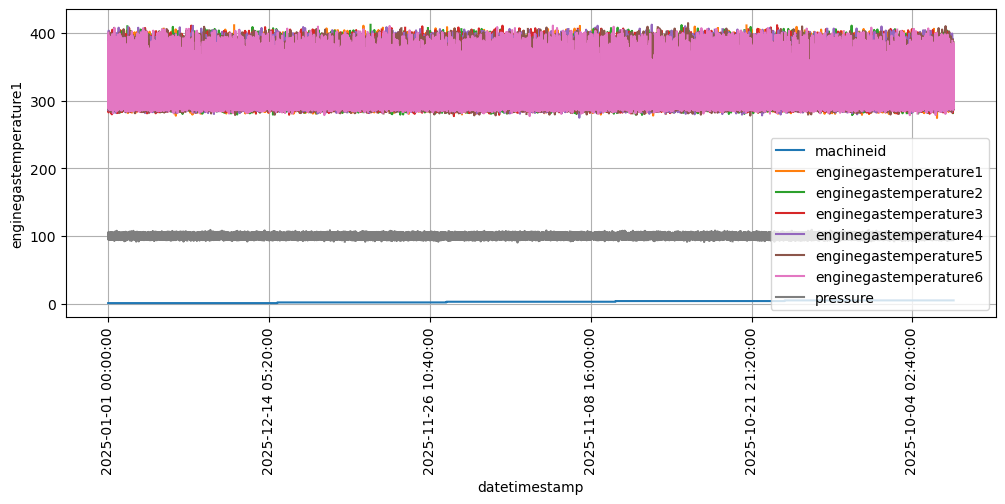

In [71]:
ax =df.plot(figsize=(12,4))
ax.grid()
plt.xticks(rotation=90) 
ax.set_ylabel('enginegastemperature1');

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['enginegastemperature1'], label='enginegastemperature1', color='blue')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('enginegastemperature1')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=90) 
plt.show()

## Distribution

In [72]:
columns_plot=['enginegastemperature1', 'enginegastemperature2','enginegastemperature3', 'enginegastemperature4', 'enginegastemperature5', 'enginegastemperature6']
columns=['enginegastemperature1', 'enginegastemperature2','enginegastemperature3', 'enginegastemperature4', 'enginegastemperature5', 'enginegastemperature6','pressure']    

### Histogram

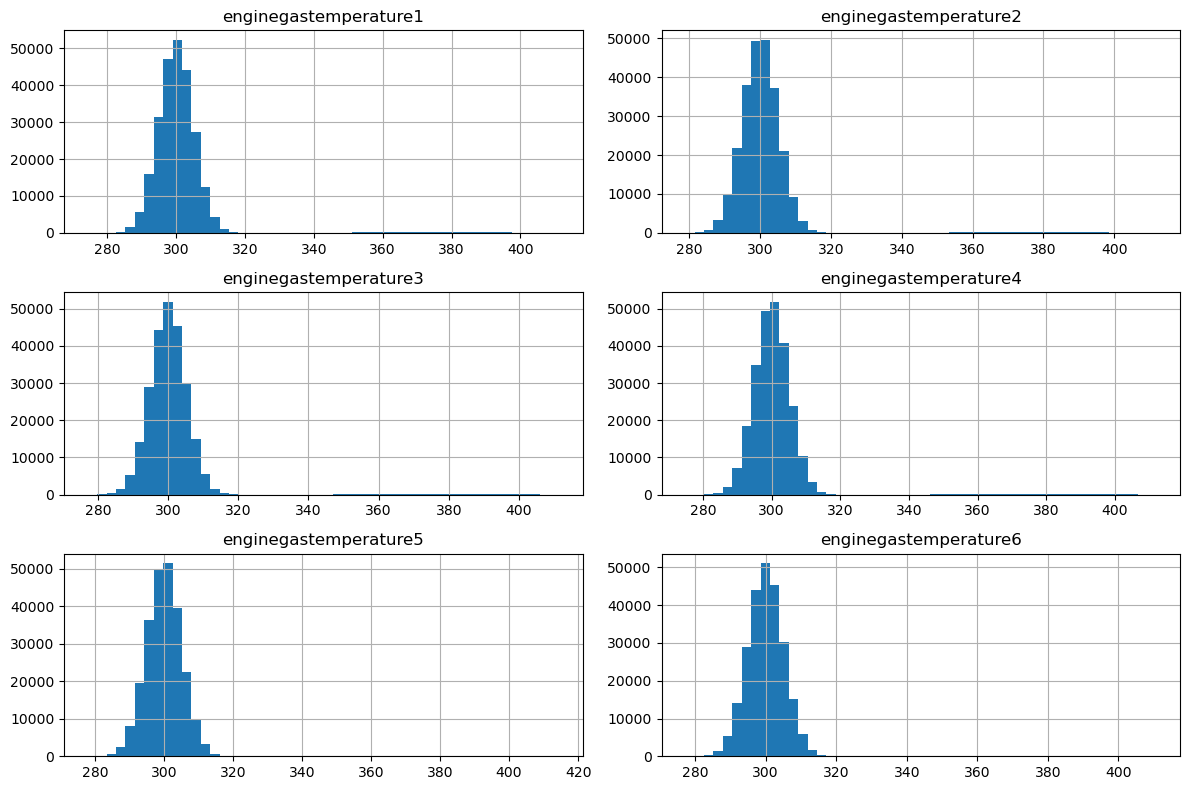

In [73]:
df[columns_plot].hist(figsize=(12, 8), bins=50)
plt.tight_layout()
plt.show()

In [ ]:
sensor_columns = [f'enginegastemperature{i}' for i in range(1, 7)] + ['pressure']

for col in sensor_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
sns.histplot(df['your_column'], kde=True)
plt.title("Histogram + KDE")
plt.show()

### Histogram + KDE (Kernel Density Estimate)

In [ ]:
sns.histplot(df[columns_plot], kde=True)
plt.title("Histogram + KDE")
plt.tight_layout()
plt.show()

### Q-Q Plot

In [ ]:
stats.probplot(df['enginegastemperature1'], dist="norm", plot=plt)
plt.title('enginegastemperature1')
plt.show()

In [ ]:
stats.probplot(df['enginegastemperature1'].dropna(), dist="norm", plot=plt)
plt.title('enginegastemperature1 Q-Q plot')
plt.show()

In [ ]:
stats.probplot(df['enginegastemperature2'], dist="norm", plot=plt)
plt.title('enginegastemperature2')
plt.show()

### Boxplot (matplotlib)

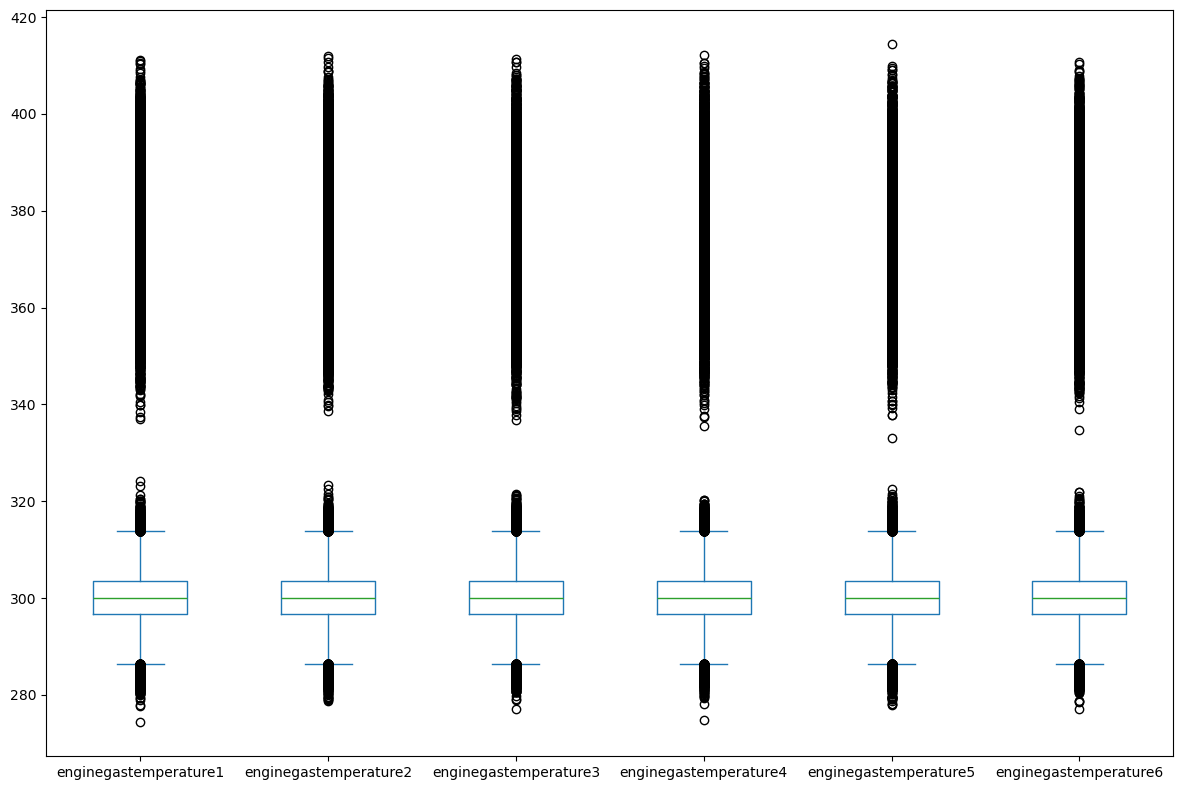

In [74]:
matplotlibBoxplot(df=df,columns=columns_plot)

### Box plot (seaborn)

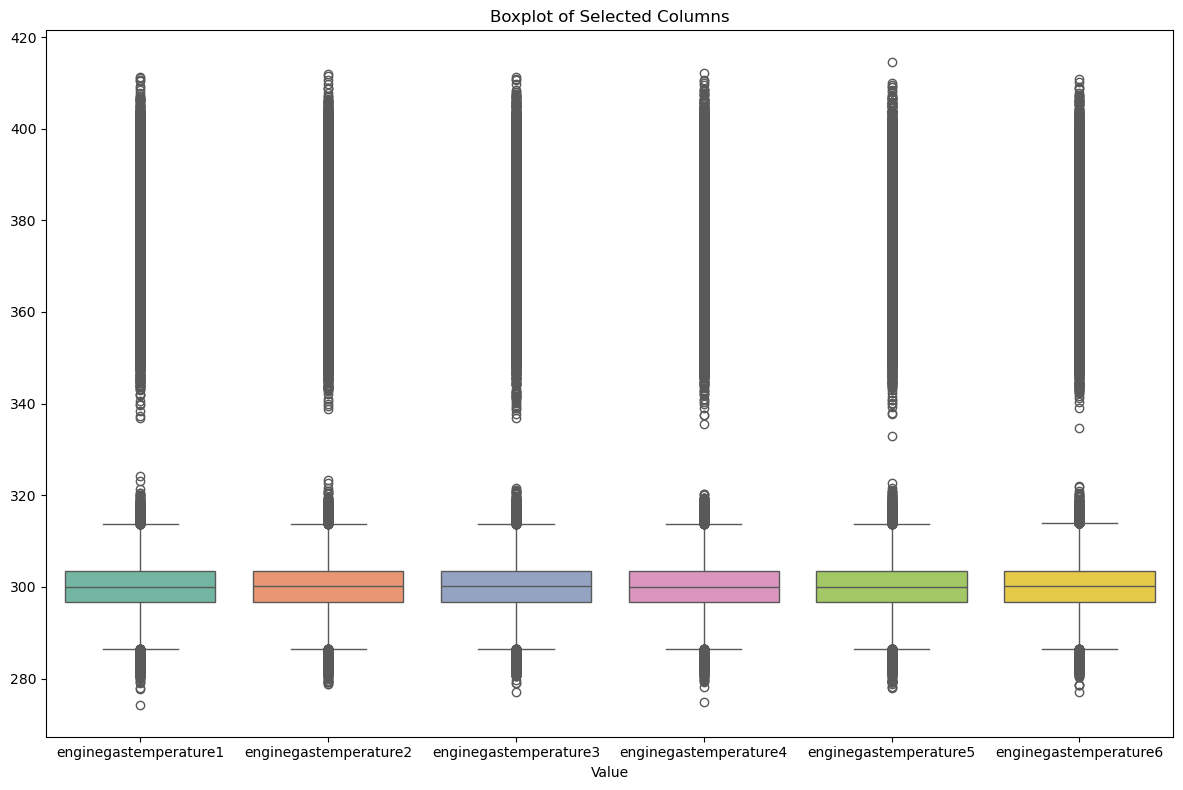

In [75]:
seabornBoxplot(df=df,columns=columns_plot)

ValueError: cannot reindex on an axis with duplicate labels

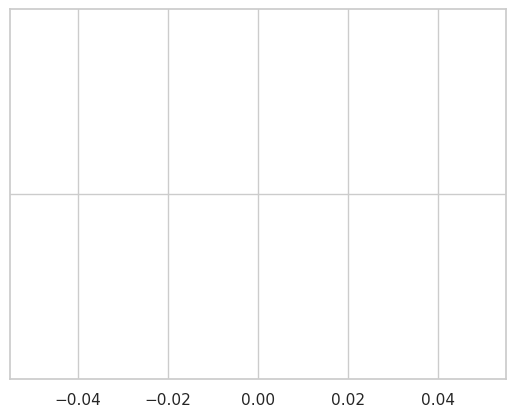

In [76]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, x="enginegastemperature1" ) # hue='machineid'

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, y="pressure" ) # hue='machineid'

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, y="pressure" ) #

### Is is normal 

In [ ]:
check_dataframe_normality(df, alpha=0.05)

In [ ]:

stat, p = shapiro(df['enginegastemperature1'].dropna())
print(f"Shapiro-Wilk p-value: {p}")

if p > 0.05:
    print("✅ Likely normal")
else:
    print("❌ Not normal")

In [ ]:
stat, p = normaltest(df['enginegastemperature1'].dropna())
print(f"D’Agostino p-value: {p}")

if p > 0.05:
    print("✅ Likely normal")
else:
    print("❌ Not normal")

## Correlation

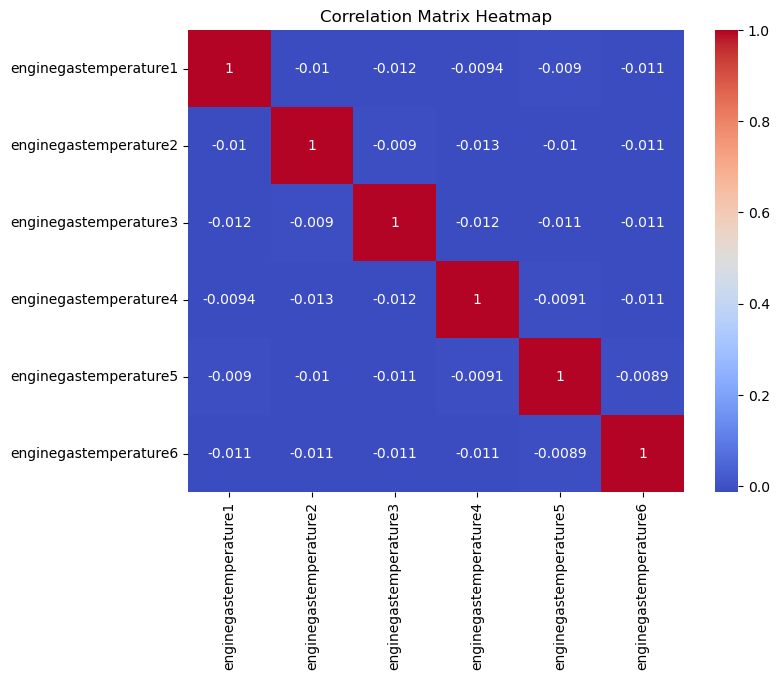

In [30]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[columns_plot].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

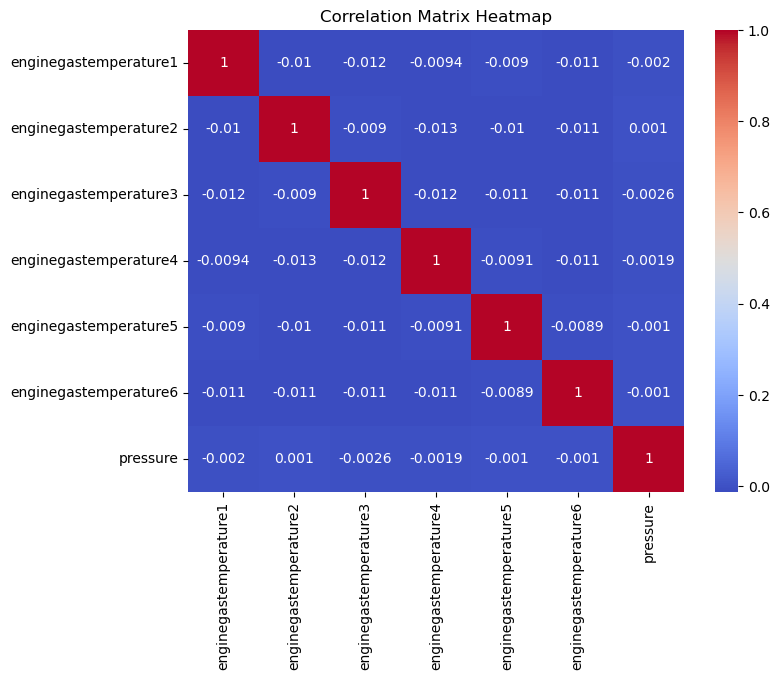

In [31]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Processing

In [ ]:
df = df.fillna(0)

In [77]:
display(df.isnull().sum())

machineid                    0
enginegastemperature1    15573
enginegastemperature2    15710
enginegastemperature3    15772
enginegastemperature4    15746
enginegastemperature5    15656
enginegastemperature6    15787
pressure                 15617
dtype: int64

## Data Sample for Visualizations

In [78]:
filtered_m1_df = df[df['machineid'] ==1]

In [79]:
filtered_m1_df

,machineid,enginegastemperature1,enginegastemperature2,enginegastemperature3,enginegastemperature4,enginegastemperature5,enginegastemperature6,pressure
datetimestamp,,,,,,,,
2025-01-01 00:00:00,1,302.483571,385.408617,303.238443,307.615149,298.829233,298.829315,103.158426
2025-01-01 00:10:00,1,303.837174,300.111109,297.861035,297.340913,299.412622,301.110395,98.464047
2025-01-01 00:20:00,1,299.877724,301.777757,302.085056,304.162309,298.533004,299.850807,100.190252
2025-01-01 00:30:00,1,303.323272,303.895963,294.494511,305.651141,301.865595,298.067635,97.682460
2025-01-01 00:40:00,1,297.766293,NaN,301.614999,NaN,289.108329,294.780518,100.345387
...,...,...,...,...,...,...,...,...
2025-12-31 23:10:00,1,304.754557,305.008887,294.737801,296.127302,288.249079,305.234508,100.126512
2025-12-31 23:20:00,1,308.862431,301.775885,301.790375,309.678478,298.004763,290.501735,99.245247
2025-12-31 23:30:00,1,295.392494,295.878337,293.587855,303.803581,310.409135,305.019800,98.108763


In [80]:
m1_df_sample = filtered_m1_df.sample(frac=0.2,random_state=42).sort_values(by=["datetimestamp"]) # machineid
m1_df_sample = m1_df_sample.drop('machineid', axis=1)

In [81]:
m1_df_sample

,enginegastemperature1,enginegastemperature2,enginegastemperature3,enginegastemperature4,enginegastemperature5,enginegastemperature6,pressure
datetimestamp,,,,,,,
2025-01-01 00:40:00,297.766293,NaN,301.614999,NaN,289.108329,294.780518,100.345387
2025-01-01 01:00:00,295.234861,294.760647,290.621616,293.166089,303.181526,295.466397,100.952085
2025-01-01 01:10:00,306.518306,303.311423,301.205611,299.158975,305.823843,298.771262,98.460664
2025-01-01 05:10:00,296.857151,296.037396,299.426318,302.524936,NaN,293.998518,99.330998
2025-01-01 05:40:00,293.525288,299.474407,290.025192,293.499036,307.715338,306.616319,99.743176
...,...,...,...,...,...,...,...
2025-12-31 18:30:00,300.972805,295.902783,300.875067,NaN,305.304342,301.747119,100.260902
2025-12-31 18:50:00,307.252881,304.897955,302.049945,299.485540,298.580003,303.024676,100.161278
2025-12-31 20:30:00,NaN,NaN,303.106527,304.297237,NaN,302.074097,98.113440


## Nulls

In [38]:
df['Strikeouts'] = df['Strikeouts'].fillna(df['Strikeouts'].median())

KeyError: 'Strikeouts'

In [ ]:
# Removing extreme values
limit_dict = {}
 
for col_name in df.columns:
    if (df[col_name].dtype in ['int64', 'float64']):
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3 - q1
        limit = q3 + (3.5*iqr)
        limit_dict[col_name] = limit
 
cond = [True]*len(df)
for key, limit in limit_dict.items():
    cond = cond & (df[key] <= limit)
    
print(len(df))
clean_df = df[cond]
print(len(clean_df)) 

# Seasonality

In [82]:
variables = ["enginegastemperature1","enginegastemperature2","enginegastemperature3","enginegastemperature4","enginegastemperature5","enginegastemperature6", "pressure"]

In [40]:

# Iterate through the relevant variables
for var in variables:
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(m1_df_sample[var], model='additive', period=24)  # Assuming daily seasonality

    # Plot the decomposed components
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(decomposition.observed)
    plt.title(f'Observed {var}')
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend)
    plt.title(f'Trend {var}')
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal)
    plt.title(f'Seasonality {var}')
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid)
    plt.title(f'Residuals {var}')
    plt.tight_layout()
    plt.show()

    # Analyze the plots and document observations (example)
    print(f"Analysis of {var}:")
    print("Trend: ", end="") # Add your trend observation here
    print("Seasonality: ", end="") # Add your seasonality observation here
    print("Residuals: ", end="") # Add your residual observation here
    print("-" * 20)

KeyboardInterrupt: 

In [83]:
def analyze_seasonality(df, time_col='datetimestamp', freq='D'):
    # Convert datetime column
    df[time_col] = pd.to_datetime(df[time_col])
    df = df.set_index(time_col)
    
    # Resample to daily frequency (or change as needed)
    df_daily = df.resample(freq).mean()

    # Iterate through each numeric column
    for col in df_daily.select_dtypes(include='number').columns:
        print(f"\n Seasonality for: {col}")
        
        # Drop NA values (required for decomposition)
        series = df_daily[col].dropna()

        if len(series) < 2:
            print("❌Not enough data to analyze.")
            continue
        
        try:
            result = seasonal_decompose(series, model='additive', period=7)  # or period=365 for yearly
            # Plot seasonal decomposition with custom settings
            fig = result.plot()
            fig.set_size_inches(14, 10)  # 🔧 Chart size (width, height)
            
            # Rotate x-axis labels and adjust font size
            for ax in fig.axes:
                ax.tick_params(axis='x', rotation=45, labelsize=10)  # ⏱️ Rotate x-axis, set font size
                ax.tick_params(axis='y', labelsize=10)  # Set y-axis font size
                ax.set_ylabel(ax.get_ylabel(), fontsize=12)
                ax.set_title(ax.get_title(), fontsize=14)
            
            plt.suptitle(f'Seasonal Decomposition of {col}', fontsize=16)
            plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
            plt.show()
        except Exception as e:
            print(f"⚠️ Could not decompose {col}: {e}")


In [84]:
analyze_seasonality(df=m1_df_sample, time_col='datetimestamp', freq='D')

KeyError: 'datetimestamp'

# Rollling

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(df.index, df['enginegastemperature1'], label='Value', color='blue')
plt.xticks(rotation=90)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt
KeyboardInterrupt: 


In [ ]:
df['enginegastemperature1'].plot(figsize=(30,5))
plt.xticks(rotation=90)
df.rolling(window=30).mean()['enginegastemperature1'].plot()


# Feature eng

In [ ]:
feature engineering considering that I want to perform anomaly detection and use the temperature of each sensor to detect anomalies 

# Based on the goal of anomaly detection using temperature data, here are features relevant to capturing anomalies and potential failures:

# 1. Rolling Mean and Standard Deviation (already calculated with window_size=12):
# These features capture the smoothed trend and variability of the temperature over a recent window. Deviations from these can indicate an anomaly.

# 2. Rate of Change (already calculated as _diff):
# This feature captures how quickly the temperature is changing. Sudden spikes or drops could indicate a sensor malfunction or an unusual event.

# 3. Deviation from Rolling Mean:
# Explicitly calculating the difference between the current reading and the rolling mean can be a powerful feature. A large positive or negative deviation indicates the current reading is far from its recent average.

for col in temperature_columns:
    df[f'{col}_deviation_from_rolling_mean_{window_size}'] = df[col] - df[f'{col}_rolling_mean_{window_size}']

# 4. Ratio to Rolling Standard Deviation:
# This feature normalizes the deviation by the recent variability. A high value indicates a significant deviation relative to the typical fluctuations, making it robust to different sensors or operating conditions. This is essentially the Z-score calculated on a rolling basis.

for col in temperature_columns:
    df[f'{col}_ratio_to_rolling_std_{window_size}'] = df[f'{col}_deviation_from_rolling_mean_{window_size}'] / df[f'{col}_rolling_std_{window_size}']

# 5. Time-based features (already calculated: hour, dayofweek):
# These capture potential cyclical patterns in temperature related to time of day or day of week, which might influence normal temperature ranges. Anomalies might occur more frequently during specific times.

# 6. Lagged Features:
# Including previous temperature readings can help the model understand the time-dependent nature of the data and predict future values or detect deviations from expected sequences.

lag_size = 1 # Example lag size

for col in temperature_columns:
    df[f'{col}_lag_{lag_size}'] = df[col].shift(lag_size)

# 7. Expanding Statistics:
# While rolling statistics focus on a fixed window, expanding statistics consider all data up to the current point. This can capture long-term trends and deviations from the overall history.

# for col in temperature_columns:
#     df[f'{col}_expanding_mean'] = df[col].expanding().mean()
#     df[f'{col}_expanding_std'] = df[col].expanding().std()

# Note: Expanding statistics can be less sensitive to recent changes compared to rolling statistics, but can be useful as supplementary features.

# 8. Interactions:
# Interactions between different temperature sensors or between temperature and pressure could reveal relationships that break down during a failure. For example, a sudden divergence between two temperature sensors that usually track closely.

# Example interaction feature: difference between two temperature sensors
# df['temp_diff_1_2'] = df['enginegastemperature1'] - df['enginegastemperature2']

# 9. Features based on the defined failure criteria:
# While `_failure_flag` is the target, the components used to calculate it (deviation from rolling mean, rolling std) are valuable features for the model to learn the patterns leading to a failure.

# Drop rows with NaN values introduced by lagging and rolling calculations
df.dropna(inplace=True)

# Display the dataframe with new features
display(df.head())

# Update the list of features for modeling
features = [col for col in df.columns if col not in temperature_failure_flags and col not in ['datetimestamp']]

X = df[features]
y = df[temperature_failure_flags]

# Re-split the data with the new features
train_size = int(len(df) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:len(df)]
y_train, y_test = y[0:train_size], y[train_size:len(df)]

print("\nUpdated Training set shapes:")
print(f"Features (X_train): {X_train.shape}")
print(f"Targets (y_train): {y_train.shape}")
print("\nUpdated Testing set shapes:")
print(f"Features (X_test): {X_test.shape}")
print(f"Targets (y_test): {y_test.shape}")

In [ ]:
def generate_anomaly_features(df, time_col='datetimestamp', machine_col='machineid',
                               sensor_cols=None, rolling_window=6):
    """
    Generate time-based, rolling, lag, and cumulative features for anomaly detection.

    Parameters:
        df (pd.DataFrame): Input dataframe
        time_col (str): Name of the timestamp column
        machine_col (str): Machine ID or grouping column
        sensor_cols (list): List of sensor columns to engineer features on
        rolling_window (int): Window size for rolling statistics

    Returns:
        pd.DataFrame: DataFrame with new engineered features
    """
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])
    df = df.sort_values([machine_col, time_col])

    # Basic time features
    df['hour'] = df[time_col].dt.hour
    df['dayofweek'] = df[time_col].dt.dayofweek
    df['month'] = df[time_col].dt.month
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

    # If no sensor columns provided, auto-detect numeric columns (excluding IDs and datetime)
    if sensor_cols is None:
        sensor_cols = df.select_dtypes(include='number').columns.difference([machine_col])

    # Rolling stats, lag, diff, cumsum
    for col in sensor_cols:
        group = df.groupby(machine_col)[col]
        df[f'{col}_roll_mean'] = group.transform(lambda x: x.rolling(rolling_window, min_periods=1).mean())
        df[f'{col}_roll_std'] = group.transform(lambda x: x.rolling(rolling_window, min_periods=1).std())
        df[f'{col}_lag1'] = group.shift(1)
        df[f'{col}_diff1'] = df[col] - df[f'{col}_lag1']
        df[f'{col}_cumsum'] = group.cumsum()

    return df

# Model

## model approaches considering that I want to perform anomaly detection and use the temperature of each sensor to detect anomalies 

Based on the exploratory data analysis, feature engineering, and the goal of detecting temperature port failures using time series data, here are several promising modeling approaches, along with their pros and cons:

1.  **Statistical Time Series Models (e.g., ARIMA, SARIMA):**
    *   **Pros:** Good for modeling linear relationships, capturing seasonality and trends. Can provide interpretable insights into the underlying time series structure.
    *   **Cons:** Primarily designed for univariate time series forecasting. Extending to multivariate (multiple sensors) can be complex (VARIMA). Less effective at capturing complex non-linear patterns or incorporating many external features (like rolling statistics, time of day). Requires stationary data or differencing. May not directly handle the defined anomaly criteria (deviation from rolling mean) well without significant pre-processing.

2.  **Traditional Machine Learning Models (e.g., Logistic Regression, Random Forest, Gradient Boosting - XGBoost, LightGBM):**
    *   **Pros:** Can handle multivariate data and incorporate the engineered features (rolling statistics, rate of change, time-based features, deviations). Relatively interpretable (especially tree-based models). Can handle non-linear relationships. XGBoost/LightGBM are powerful and often perform well on structured data. Class imbalance can be addressed using techniques like class weighting, SMOTE, or specific algorithms designed for imbalanced data.
    *   **Cons:** Treats the time series data as independent samples unless lagged features are explicitly engineered. Doesn't inherently model the sequential dependencies in the data as well as dedicated time series models or recurrent neural networks.

3.  **Anomaly Detection Algorithms (e.g., Isolation Forest, One-Class SVM, Local Outlier Factor - LOF):**
    *   **Pros:** Specifically designed for identifying outliers or anomalies in data without requiring labeled anomaly data during training (unsupervised or semi-supervised). Can be effective if the "failure" is truly a rare event that looks distinctly different from normal operating conditions.
    *   **Cons:** May struggle to distinguish between "true" failures and other types of outliers or noisy data. One-Class SVM can be sensitive to hyperparameter tuning. LOF is density-based and can be computationally expensive for large datasets. These models might flag deviations based purely on feature distribution, which may not always align with the defined failure criteria (deviation from rolling statistics).

4.  **Deep Learning Models (e.g., Recurrent Neural Networks - RNNs, LSTMs, GRUs, Transformers):**
    *   **Pros:** Excellent at modeling sequential data and capturing temporal dependencies and complex non-linear patterns automatically from raw or minimally engineered time series data. Can potentially learn intricate relationships between different sensors over time. LSTMs and GRUs are effective at handling vanishing gradients. Can be trained to predict the next temperature value and flag anomalies based on large prediction errors, or trained directly on the engineered features.
    *   **Cons:** Require significant amounts of data and computational resources. Can be complex to design and train. Less interpretable than traditional models. Prone to overfitting, especially on smaller datasets.

5.  **Hybrid Approaches:**
    *   **Pros:** Combining strengths of different methods. For example, using statistical methods or deep learning to extract features or predict baseline behavior, and then using a simpler model (like Logistic Regression or a thresholding method) on the residuals or deviations to detect anomalies. Or using unsupervised anomaly detection algorithms to pre-filter potential anomalies which are then examined by a supervised model.

**Suggested Approach(es) based on the current analysis:**

Given that you have successfully engineered features that capture deviations from expected behavior based on rolling statistics, and you have a defined target variable (even if rare), a **supervised or semi-supervised approach using traditional machine learning models or deep learning on the engineered features** seems most promising initially.

*   **Option A (Traditional ML):** Use models like **XGBoost, LightGBM, or Random Forest** trained on the engineered features (original readings, rolling stats, deviations, ratios, diffs, time features, lags). These models are powerful, can handle the potentially large feature space, and can incorporate techniques to mitigate class imbalance. The initial success with Logistic Regression suggests these models, which are generally more powerful, will also perform well.
*   **Option B (Deep Learning):** Train an **LSTM or GRU model** on sequences of the engineered features or even raw temperature data. The model could be trained for sequence prediction (predicting the next time step's temperature) and anomalies could be detected when the prediction error exceeds a threshold. Alternatively, train the LSTM/GRU directly to classify sequences as "normal" or "anomaly" using the engineered features. This could potentially capture more complex temporal patterns leading to failures.
*   **Option C (Anomaly Detection as a first pass):** Use an **Isolation Forest** or **One-Class SVM** on the engineered features (especially those related to deviation and ratio) to identify the most significant outliers. These identified outliers could then be further analyzed or used to refine the training set for a supervised model.

**Recommendation:**

Start with **Option A (XGBoost/LightGBM)**. These models are generally easier to implement and interpret compared to deep learning and have a strong track record in similar problems. Leverage the engineered features related to deviations (`_deviation_from_rolling_mean`, `_ratio_to_rolling_std`), as these directly capture the criteria you've defined for a failure. Address the class imbalance rigorously using techniques within these algorithms (e.g., `scale_pos_weight` in XGBoost/LightGBM) or through data resampling.

If the performance of traditional ML is not satisfactory, or if there's evidence of complex temporal patterns not captured by the engineered features, then explore **Option B (LSTM/GRU)**. This would involve structuring the data into sequences and training a recurrent model.

Using **Option C (Anomaly Detection)** can be a valuable supplementary approach to identify potential anomalies that might not strictly meet the defined 3-sigma rule but are still unusual and worth investigating.

Continue to iterate on feature engineering and model evaluation, focusing on metrics appropriate for imbalanced datasets like Precision, Recall, F1-score, and the Area Under the Precision-Recall Curve (AUPRC), in addition to ROC AUC.

# Results

* Time series decomposition was performed on all variables to identify trends, seasonality, and residuals. However, the provided output lacks the analysis of the generated plots.
  A correlation heatmap visualized the relationships between the numerical variables in the dataset, excluding `machineID`.
  *   New time-based features (`day_of_week`, `hour_of_day`, `month`, `week_of_year`) were engineered from the datetime index.

## Isolation Forest

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Select features relevant for anomaly detection.
# These could be the original sensor readings or engineered features like deviations and ratios.
# Using a subset of features often works well for Isolation Forest.
# Let's use the original temperature and pressure readings for simplicity in this concept simulation.
features_for_anomaly = [f'enginegastemperature{i}' for i in range(1, 7)] + ['pressure']

# Drop rows with NaN values introduced by previous feature engineering steps if any
# Although the data is already clean after dropna, it's good practice if using a subset of features
# that might not have NaNs.
X_anomaly = df[features_for_anomaly].copy()

# Initialize Isolation Forest model
# n_estimators: The number of base estimators in the ensemble.
# contamination: The proportion of outliers in the data set.
#   'auto': decides based on the training data's distribution.
#   float: The proportion of outliers in the data set.
#   We can set a contamination value based on our understanding or let it be 'auto'.
#   Given the low number of defined failures, a small contamination value might be reasonable,
#   or 'auto' can be tried first. Let's use 'auto' initially.
# random_state: Ensures reproducibility.
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model to the data
# Isolation Forest trains on the entire dataset to find anomalies.
isolation_forest.fit(X_anomaly)

# Predict anomalies
# predict returns -1 for outliers and 1 for inliers.
# We want to identify the outliers (-1).
df['isolation_forest_anomaly'] = isolation_forest.predict(X_anomaly)

# Convert predictions to a more intuitive format: 1 for anomaly, 0 for normal
df['isolation_forest_anomaly'] = df['isolation_forest_anomaly'].map({-1: 1, 1: 0})

# Display the number of anomalies detected by Isolation Forest
print("Number of anomalies detected by Isolation Forest:", df['isolation_forest_anomaly'].sum())

# Compare Isolation Forest anomalies with the defined failure flags
print("\nComparison of Isolation Forest anomalies and defined failure flags:")

# Create a combined failure flag for any temperature sensor failure
df['any_temp_failure'] = df[temperature_failure_flags].max(axis=1)

# Calculate a confusion matrix or cross-tabulation
comparison_table = pd.crosstab(df['isolation_forest_anomaly'], df['any_temp_failure'],
                               rownames=['Isolation Forest Anomaly'], colnames=['Defined Failure Flag'])
print(comparison_table)

# Note: This comparison is a concept simulation. Isolation Forest is unsupervised
# and identifies statistical outliers based on the feature distribution.
# The defined failure flags are based on a specific domain-knowledge-driven rule.
# The two might not perfectly align. The table shows how many instances flagged by Isolation Forest
# were also flagged by your rule, and vice versa.

# Visualize a sample of data points, highlighting Isolation Forest anomalies
# Select a subset of features for visualization
viz_features = ['enginegastemperature1', 'enginegastemperature2'] # Example
plt.figure(figsize=(15, 7))
# Plot normal points
plt.scatter(df.index[df['isolation_forest_anomaly'] == 0], df[viz_features[0]][df['isolation_forest_anomaly'] == 0],
            c='blue', s=10, label='Normal')
# Plot anomalies
plt.scatter(df.index[df['isolation_forest_anomaly'] == 1], df[viz_features[0]][df['isolation_forest_anomaly'] == 1],
            c='red', s=20, label='Anomaly (Isolation Forest)')
plt.title(f'Isolation Forest Anomaly Detection on {viz_features[0]} over Time')
plt.xlabel('Time')
plt.ylabel(viz_features[0])
plt.legend()
plt.show()

# You can repeat the visualization for other sensors or combinations of features.
